In [1]:
## 训练过程（无需数据归一）
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data[:,2:], iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
## 可视化过程（另外安装Graphviz软件）
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file='./6.dot',
                class_names=iris.target_names,rounded=True,filled=True)
##当前工作目录下输入：dot -Tpng 6.dot -o 6.png

Gini分数
p是第i个节点中训练实例为k类的实例的占比
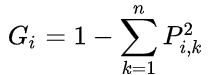

In [9]:
## 估计分类概率/结果
tree_clf.predict([[5,1.5]])
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

熵 其中p是第i个节点中训练实例为k类的实例的占比
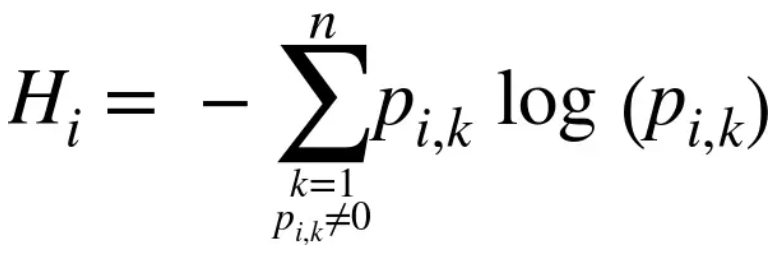

In [10]:
## 对数据旋转敏感
# 决策树很喜欢设定正交化的决策边界。
# 更加通俗的讲，决策时的主要问题是它对训练数据的微小变化非常敏感。
# 解决的一个办法是PCA降维。
np.random.seed(6)
Xs = np.random.rand(100,2)-0.5
ys = (Xs[:,0]>0).astype('float')*2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],
                            [np.sin(angle),np.cos(angle)]])
Xsr = np.dot(Xs, rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs,ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr,ys)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [13]:
## 回归
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [15]:
export_graphviz(tree_reg, out_file='./6_2.dot',
                rounded=True,filled=True)

损失函数：
试图最小化MSE，而不是最小化不纯度。
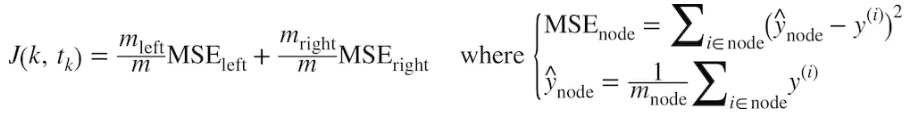

In [16]:
#对moons数据集进行决策树训练并优化模型

In [17]:
# 生成森林